In [27]:
#importing libraries

import random as rd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import rsa
import numpy as np


In [28]:
#declaring of varibles
numberOfExperts = 0
numberOfCandidates = 0


#Collection of rsa public and private keys for digital signature
dictOfrsaPubKey = {}
dictOfrsaPriKey = {}
marksToCandidates = []


In [29]:
def initVariables(E,C):
    global numberOfExperts, numberOfCandidates
    numberOfExperts, numberOfCandidates = E, C


In [30]:
#code to generate rsa public and private keys
def generateRSAKeys():
    global dictOfrsaPubKey, dicOfrsaPriKey
    for i in range(numberOfExperts):
        (pubkey, privkey) = rsa.newkeys(512)
        dictOfrsaPubKey[i],dictOfrsaPriKey[i] = pubkey, privkey 


In [31]:
# function to create digital signature
def createDigitalSignature(message,i):
    privkey = dictOfrsaPriKey[i]
    temp = str(message).encode()
    signature = rsa.sign(temp, privkey, 'SHA-1')
    return signature

In [32]:
#this part of the code finds the highest marks gaining candidate id this acts as the candidate manager for the first frame work
def candidateManagerFrameWork1BestCandidate():
    array  = []
    for i in range(len(marksToCandidates[0])):
        sum = 0
        for j in range(len(marksToCandidates)):
            sum = sum + marksToCandidates[j][i][0]
        # print(sum)
        array.append(sum)
    return array


In [33]:
def employerSelectsBestCandidate(array):
    return array.index(max(array))

In [34]:
#this part of the code defines the first frame work
def expertFunctionToGiveMarks():
    global marksToCandidates
    marksToCandidates = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    start = timer()
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            mark = rd.randint(0,10)
            marksToCandidates[i][j] = [mark,createDigitalSignature(mark,i)]
    end = timer()
    return (end - start)

In [35]:
def runSimulation(experts,candidates,flag):
    experts = experts
    timeList = []
    candidates = candidates
    totalTime = 0
    if flag == "candidates":
        for i in range(len(candidates)):
            start = timer()
            initVariables(experts,candidates[i])
            generateRSAKeys()
            end = timer()
            t1 = end - start
            t2 = expertFunctionToGiveMarks()
            start = timer()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            end = timer()
            t3 = end - start
            totalTime =  t1 + (t2 / experts) + t3
            timeList.append(totalTime)
    else: 
        for i in range(len(experts)):
            start = timer()
            initVariables(experts[i],candidates)
            generateRSAKeys()
            end = timer()
            t1 = end - start
            t2 = expertFunctionToGiveMarks()
            start = timer()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            end = timer()
            t3 = end - start
            totalTime = t1 + (t2 / experts[i]) + t3
            timeList.append(totalTime)
    return (timeList)

In [36]:
#this part of the code run the simulation for defined number of times and helps us to calcuate average execution time
def averageTimeConsumedFunction(experts, candidates,flag):
    timeMatrix = []
    for i in range(0,4):
        timeList= runSimulation(experts, candidates,flag)
        timeMatrix.append(timeList)
    # print(timeMatrix)        
    arr = np.array(timeMatrix, dtype='float32')
    # print(arr)
    columns_average = arr.mean(axis=0)

    if flag == "candidates":
        plt.title("number of experts " + str(experts) )
        plt.xlabel("number Of Candidates")
        plt.ylabel("Average Execution Time")   
        plt.bar(candidates, columns_average)
        plt.show()
        print(columns_average)
    else :
        plt.title("number of candidates " + str(candidates))
        plt.xlabel("number Of Experts")
        plt.ylabel("Average Execution Time")   
        plt.bar(experts, columns_average)
        plt.show()
        print(columns_average)
    
    return columns_average

        

In [37]:
def simulationHavingExpertsConstCandidatesVariable(experts, candidates,flag):
    column_average = averageTimeConsumedFunction(experts,candidates,flag)
    return column_average
    

In [38]:
def simulationHavingExpertsvariableCandidatesConst(experts,candidates,flag):
    column_average = averageTimeConsumedFunction(experts,candidates,flag)
    return column_average

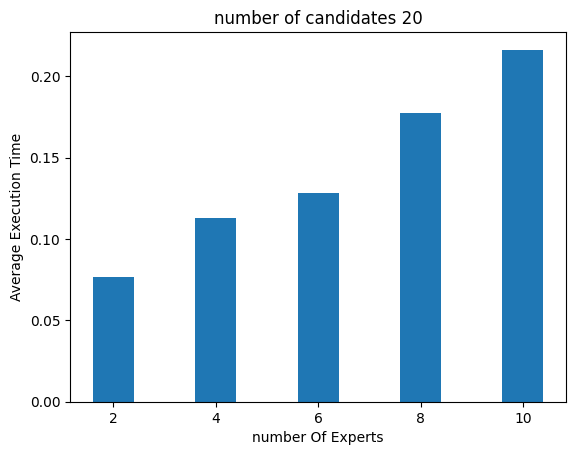

[0.07646027 0.11298171 0.12823433 0.17712876 0.2162978 ]


In [39]:
time =  simulationHavingExpertsvariableCandidatesConst([2,4,6,8,10],20,"experts")

In [40]:
F1Time = []
F1Time = time

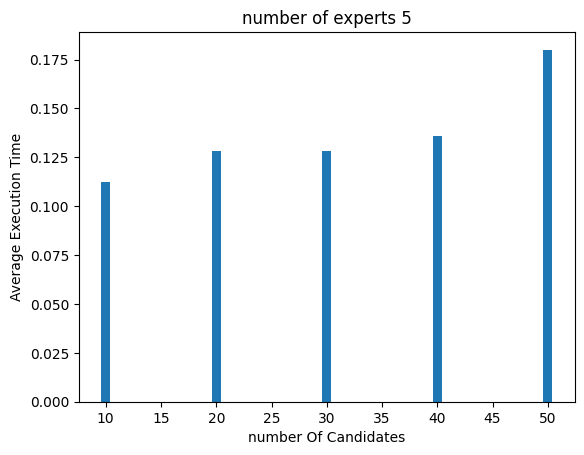

[0.1126069  0.12840623 0.12828112 0.13599505 0.18005241]


In [49]:
time = simulationHavingExpertsConstCandidatesVariable(5,[10,20,30,40,50],"candidates")
F1TimeCandidateVariable = []
F1TimeCandidateVariable = time

In [58]:
%store -r F2Time
%store -r F3Time
%store -r F4Time
%store -r F2TimeCandidateVariable
%store -r F3TimeCandidateVariable
%store -r F4TimeCandidateVariable

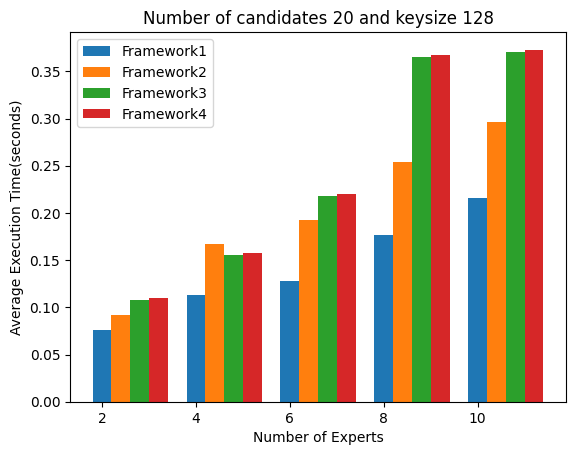

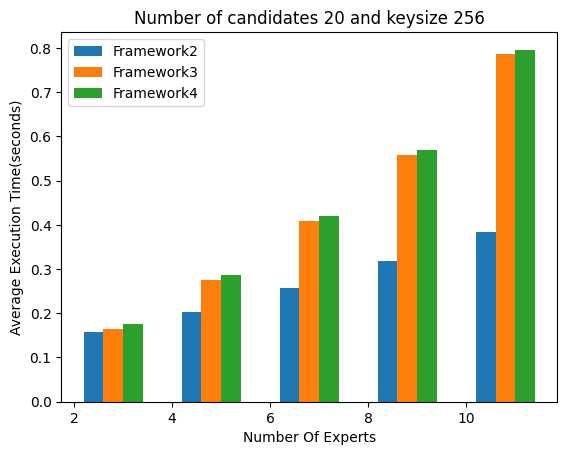

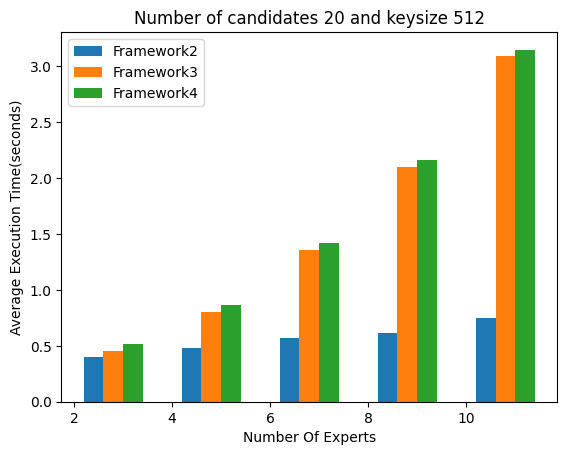

In [59]:
for i in range(0,3):
    X = [2,4,6,8,10] 
    width = 0.2
    X_axis = np.arange(len(X)) 
    
    if i == 0 :
        plt.bar(X_axis , F1Time, width, label = 'Framework1') 
        plt.bar(X_axis + width  , F2Time[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3Time[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4Time[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number of Experts") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of candidates 20 and keysize 128"  ) 
        plt.legend() 
        plt.show()
        
    else:
        
        plt.bar(X_axis + width  , F2Time[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3Time[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4Time[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number Of Experts") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of candidates 20 and keysize " + str(128 * (i * 2))) 
        plt.legend() 
        plt.show()

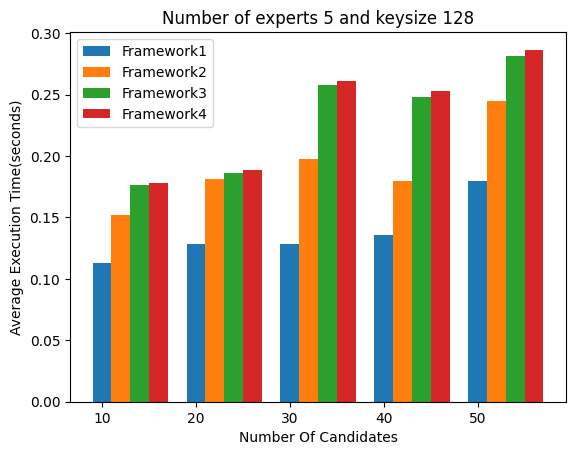

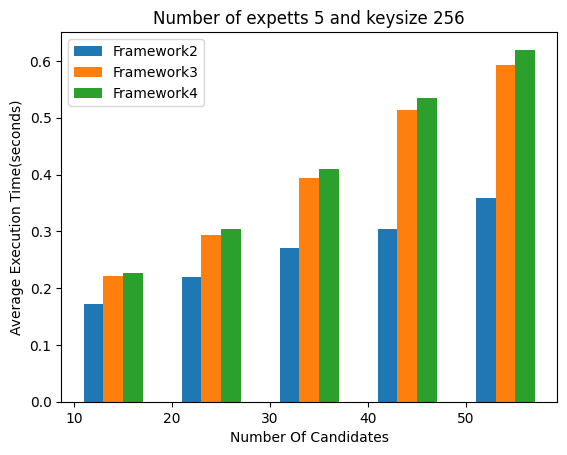

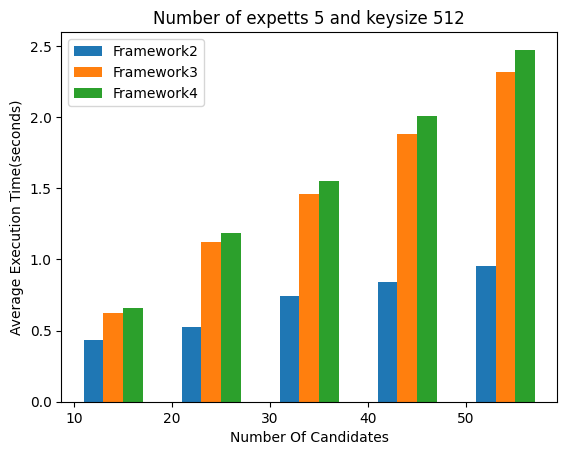

In [50]:
for i in range(0,3):
    X = [10,20,30,40,50] 
    width = 0.2
    X_axis = np.arange(len(X)) 
    
    if i == 0 :
        plt.bar(X_axis , F1TimeCandidateVariable, width, label = 'Framework1') 
        plt.bar(X_axis + width  , F2TimeCandidateVariable[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3TimeCandidateVariable[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4TimeCandidateVariable[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number Of Candidates") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of experts 5 and keysize 128"  ) 
        plt.legend() 
        plt.show()
    else:
        
        plt.bar(X_axis + width  , F2TimeCandidateVariable[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3TimeCandidateVariable[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4TimeCandidateVariable[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number Of Candidates") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of expetts 5 and keysize " + str(128 * (i * 2))) 
        plt.legend() 
        plt.show()

In [45]:
print(F1Time)
print(F2Time)
print(F3Time)
print(F4Time)

[0.07646027 0.11298171 0.12823433 0.17712876 0.2162978 ]
[array([0.07267719, 0.16372254, 0.20580979, 0.24687397, 0.2731675 ],
      dtype=float32), array([0.16087815, 0.19731918, 0.23144932, 0.30758852, 0.39541396],
      dtype=float32), array([0.4013682 , 0.4853387 , 0.60553396, 0.72815025, 0.697635  ],
      dtype=float32)]
[array([0.10786579, 0.15496714, 0.21801744, 0.36508906, 0.37068895],
      dtype=float32), array([0.16476284, 0.27497405, 0.40853074, 0.5573238 , 0.7857262 ],
      dtype=float32), array([0.45243847, 0.8035923 , 1.3596793 , 2.100716  , 3.0877466 ],
      dtype=float32)]
[array([0.11012239, 0.15772764, 0.22014381, 0.3673306 , 0.37296152],
      dtype=float32), array([0.17570166, 0.28582662, 0.41914797, 0.56803685, 0.79581213],
      dtype=float32), array([0.5124863 , 0.86313677, 1.4215791 , 2.161273  , 3.1482637 ],
      dtype=float32)]


In [46]:
print(F1TimeCandidateVariable)
print(F2TimeCandidateVariable)
print(F3TimeCandidateVariable)
print(F4TimeCandidateVariable)

[0.15890917 0.13230112 0.11634137 0.13575056 0.14654426]
[array([0.20198749, 0.22748002, 0.2590716 , 0.2307927 , 0.25908494],
      dtype=float32), array([0.25728345, 0.2433253 , 0.29512775, 0.30071962, 0.34363282],
      dtype=float32), array([0.41868818, 0.52150124, 0.76013756, 0.8881844 , 0.98055327],
      dtype=float32)]
[array([0.1768324 , 0.18633197, 0.25795776, 0.24844047, 0.28107452],
      dtype=float32), array([0.22102311, 0.29320884, 0.39320236, 0.51331466, 0.593293  ],
      dtype=float32), array([0.62569517, 1.1223674 , 1.4563981 , 1.8824224 , 2.3182359 ],
      dtype=float32)]
[array([0.17789273, 0.18863003, 0.26129073, 0.253111  , 0.28656936],
      dtype=float32), array([0.2262831 , 0.30407062, 0.40979016, 0.5351908 , 0.6197463 ],
      dtype=float32), array([0.6568267, 1.1821617, 1.5481439, 2.004622 , 2.4732618],
      dtype=float32)]
